# Analysis and Model Building 

### Import libraries 

In [1]:
# import libraries and load csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

### Load the cleaned data

In [2]:
# Load the cleaned dataset from the directory
data_cleaned = pd.read_csv('../data/processed/data_cleaned.csv')

# Verify the data is loaded successfully
print(data_cleaned.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

## Question 1: Check if a certain type of wine is associated with higher quality

In [3]:
# Group by 'color' and calculate summary statistics for 'quality'
quality_by_color = data_cleaned.groupby('color')['quality'].agg(['mean', 'median', 'count'])

print(quality_by_color)

           mean  median  count
color                         
red    5.623252     6.0   1359
white  5.854835     6.0   3961


### Viz

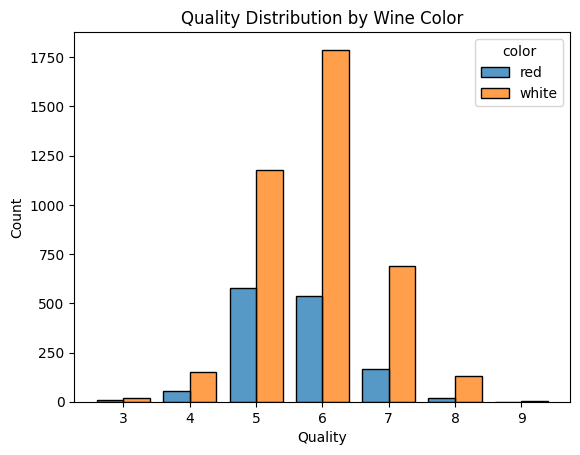

In [4]:
# Create a side-by-side histogram with spacing between bars
sns.histplot(data=data_cleaned, x='quality', hue='color', multiple='dodge', discrete=True, shrink=0.8)
plt.title('Quality Distribution by Wine Color')
plt.xlabel('Quality')
plt.ylabel('Count')
# Save the figure
plt.savefig('../Viz/quality_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### Checking for statistical significance (Hypothesis test)

In [5]:
# Split the data into red and white wines
red_wine_quality = data_cleaned[data_cleaned['color'] == 'red']['quality']
white_wine_quality = data_cleaned[data_cleaned['color'] == 'white']['quality']

# Perform a t-test
t_stat, p_value = ttest_ind(red_wine_quality, white_wine_quality)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -8.42814214552532, P-value: 4.472190708795861e-17


### Analysis of Wine Quality by Color

Based on the dataset, **white wines** are associated with **higher quality ratings** compared to red wines. Here are the key findings:

1. **Average Quality Ratings**:
   - **White Wines**: 5.85
   - **Red Wines**: 5.62

   White wines have a higher average quality rating than red wines.

2. **Statistical Significance**:
   - The difference in quality ratings is **statistically significant**.
   - The **p-value** is **4.47 × 10⁻¹⁷**, which is much smaller than the standard threshold of 0.05.
   - This indicates that the observed difference in quality is **not due to chance**.

### Conclusion
White wines are associated with **significantly higher quality ratings** than red wines in this dataset. This result is both **practically meaningful** and **statistically significant**.

## Question 2

### Do wines with higher alcoholic content receive better ratings?

In [6]:
# Calculate the correlation between alcohol and quality
correlation = data_cleaned['alcohol'].corr(data_cleaned['quality'])
print(f"Correlation between alcohol and quality: {correlation:.2f}")

Correlation between alcohol and quality: 0.47


In [7]:
# Group by quality and calculate mean alcohol
alcohol_by_quality = data_cleaned.groupby('quality')['alcohol'].mean()

print(alcohol_by_quality)

quality
3    10.215000
4    10.215049
5     9.872211
6    10.649060
7    11.511020
8    11.912162
9    12.180000
Name: alcohol, dtype: float64


### Viz

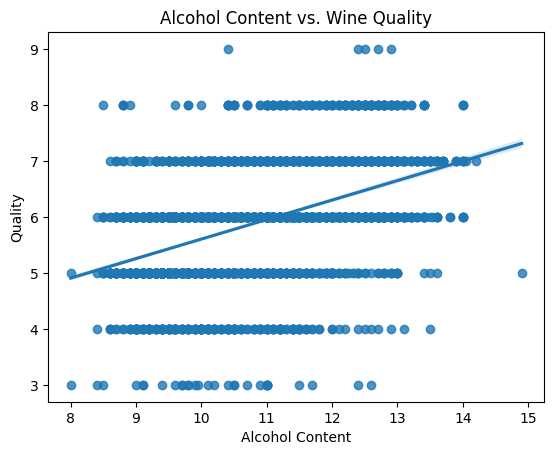

In [8]:
# Create a scatter plot of alcohol vs. quality
sns.regplot(x='alcohol', y='quality', data=data_cleaned)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
# Save the figure
plt.savefig('../Viz/alcohol_vs_wine_quality.png', dpi=300, bbox_inches='tight')
plt.show()

### Building a (linear) model to quantify the relationship - regression coefficient (slope)

In [9]:
# Add a constant to the alcohol column (required for statsmodels)
X = sm.add_constant(data_cleaned['alcohol'])
y = data_cleaned['quality']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1503.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          8.28e-290
Time:                        14:09:20   Log-Likelihood:                -6204.7
No. Observations:                5320   AIC:                         1.241e+04
Df Residuals:                    5318   BIC:                         1.243e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1221      0.095     22.255      0.0

### Analysis of Wine Quality by Alcohol Content

Based on the dataset, **alcohol content** is associated with **higher quality ratings** for wines. Here are the key findings:

1. **Relationship Between Alcohol and Quality**:
   - For every **1% increase in alcohol content**, the **quality rating** of the wine increases by **0.35 points** on average.
   - This means that wines with higher alcohol content tend to be rated as higher quality.

2. **Strength of the Relationship**:
   - The model explains **22% of the variation** in wine quality ratings. This suggests that while alcohol content is an important factor, other factors not included in the analysis also play a significant role in determining wine quality.

3. **Statistical Significance**:
   - The relationship between alcohol content and quality is **statistically significant**.
   - The **p-value** for alcohol content is **0.000**, which is much smaller than the standard threshold of 0.05.
   - This indicates that the observed relationship between alcohol and quality is **not due to chance**.

### Conclusion
Alcohol content is **positively associated with higher quality ratings** for wines in this dataset. This result is both **practically meaningful** and **statistically significant**. However, since alcohol content alone explains only 22% of the variation in quality, other factors (e.g., acidity, sweetness, or aging) likely also contribute to wine quality. Further analysis could explore these additional factors to better understand what drives wine quality.

## Question3

### Do sweeter wines (more residual sugar) receive better ratings?

In [10]:
# Calculate the correlation between residual_sugar and quality
correlation = data_cleaned['residual_sugar'].corr(data_cleaned['quality'])
print(f"Correlation between residual_sugar and quality: {correlation:.2f}")

Correlation between residual_sugar and quality: -0.06


In [11]:
# Group by quality and calculate mean residual_sugar
sugar_by_quality = data_cleaned.groupby('quality')['residual_sugar'].mean()

print(sugar_by_quality)

quality
3    5.140000
4    4.034951
5    5.481906
6    5.153142
7    4.171320
8    4.771622
9    4.120000
Name: residual_sugar, dtype: float64


### Viz

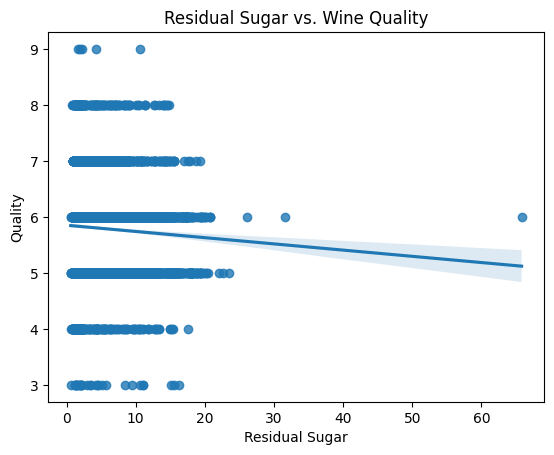

In [12]:
# Create a scatter plot of residual_sugar vs. quality
sns.regplot(x='residual_sugar', y='quality', data=data_cleaned)
plt.title('Residual Sugar vs. Wine Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.savefig('../Viz/sugar_vs_wine_quality.png', dpi=300, bbox_inches='tight')
plt.show()

### Building a (linear) model to quantify the relationship - regression coefficient (slope)

In [13]:
# Add a constant to the residual_sugar column (required for statsmodels)
X = sm.add_constant(data_cleaned['residual_sugar'])
y = data_cleaned['quality']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     17.23
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.36e-05
Time:                        14:09:32   Log-Likelihood:                -6858.2
No. Observations:                5320   AIC:                         1.372e+04
Df Residuals:                    5318   BIC:                         1.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8518      0.018    323.

### Analysis of Wine Quality by Residual Sugar Content

Based on the dataset, **residual sugar content** has a **small but statistically significant relationship** with wine quality ratings. Here are the key findings:

1. **Relationship Between Residual Sugar and Quality**:
   - For every **1 gram per liter increase in residual sugar**, the **quality rating** of the wine decreases by **0.011 points** on average.
   - This means that wines with higher residual sugar content tend to be rated slightly lower in quality.

2. **Strength of the Relationship**:
   - The model explains only **0.3% of the variation** in wine quality ratings. This indicates that residual sugar content has a **very weak influence** on wine quality compared to other factors.

3. **Statistical Significance**:
   - The relationship between residual sugar and quality is **statistically significant**.
   - The **p-value** for residual sugar is **0.000**, which is much smaller than the standard threshold of 0.05.
   - This indicates that the observed relationship between residual sugar and quality is **not due to chance**.

### Conclusion
Residual sugar content is **negatively associated with wine quality ratings** in this dataset, but the effect is **very small**. While the relationship is statistically significant, residual sugar explains only a tiny fraction (0.3%) of the variation in quality. This suggests that other factors (e.g., alcohol content, acidity, or aging) are likely much more important in determining wine quality. Further analysis could explore these additional factors to better understand what drives wine quality.

### What level of acidity is associated with the highest quality? (Question 4)

In [14]:
# Calculate correlations between acidity features and quality
acidity_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'pH']
correlations = data_cleaned[acidity_features + ['quality']].corr()['quality'].drop('quality')

print(correlations)

fixed_acidity      -0.080092
volatile_acidity   -0.265205
citric_acid         0.097954
pH                  0.039733
Name: quality, dtype: float64


In [15]:
# Group by quality and calculate mean acidity levels
acidity_by_quality = data_cleaned.groupby('quality')[acidity_features].mean()

print(acidity_by_quality)

         fixed_acidity  volatile_acidity  citric_acid        pH
quality                                                        
3             7.853333          0.517000     0.281000  3.257667
4             7.304369          0.462379     0.271505  3.235874
5             7.333248          0.393970     0.305845  3.214275
6             7.169027          0.315626     0.324671  3.224120
7             7.122021          0.292342     0.336040  3.240479
8             6.820270          0.302973     0.340541  3.239595
9             7.420000          0.298000     0.386000  3.308000


### Viz

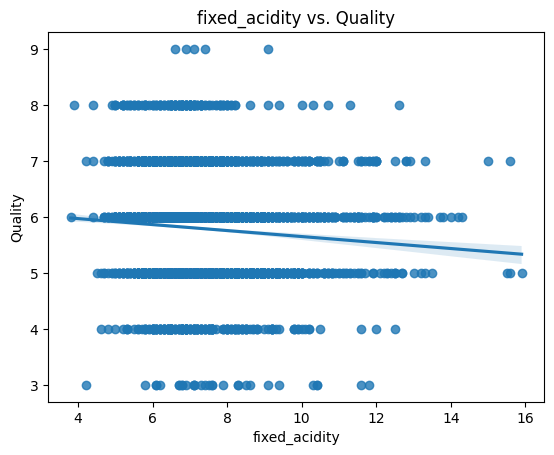

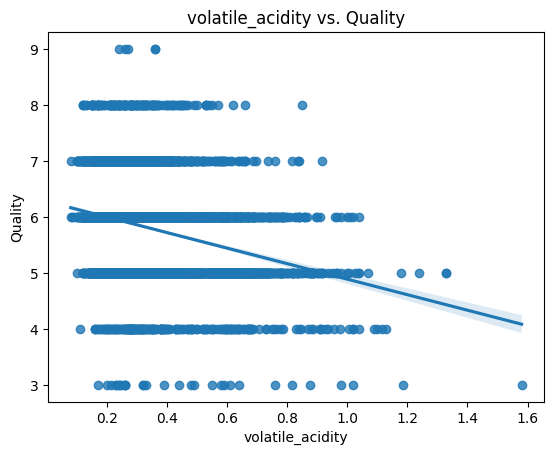

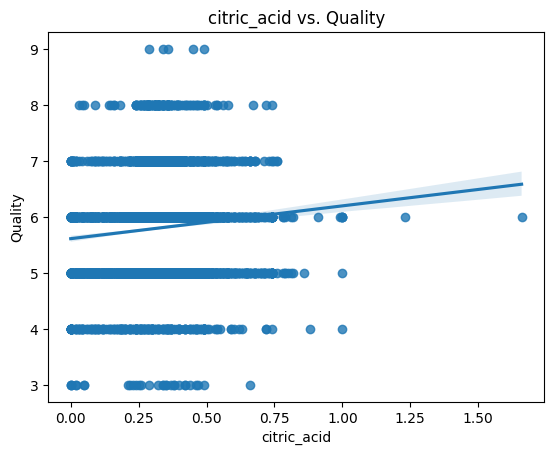

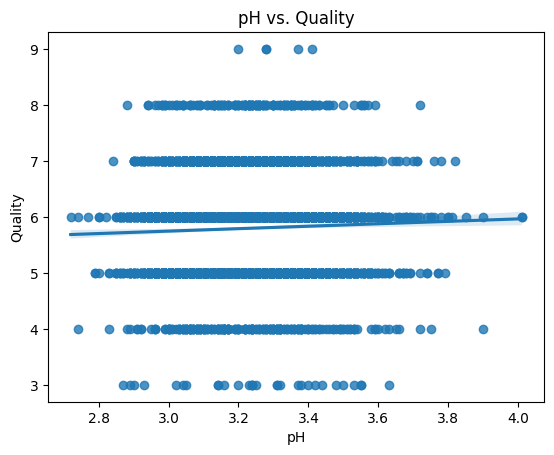

In [16]:
# Create scatter plots for each acidity feature
for feature in acidity_features:
    sns.regplot(x=feature, y='quality', data=data_cleaned)
    plt.title(f'{feature} vs. Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.savefig('../Viz/acidity_vs_wine_quality.png', dpi=300, bbox_inches='tight')
    plt.show()

## Modeling for features importance and predictions

### Prepare for modeling

In [17]:
# Features (independent variables)
X = data_cleaned.drop(columns=['quality'])

# Target (dependent variable)
y = data_cleaned['quality']

In [18]:
# One-hot encode the 'color' column
X = pd.get_dummies(X, columns=['color'], drop_first=True)

In [19]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,False


In [20]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [21]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

In [23]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.51
MSE: 0.44
R²: 0.41


### Hyperparameter tuning and testing

In [25]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
# Evaluate the best model on the test set
y_pred_tuned = best_model.predict(X_test)

# Recalculate metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"MAE (Tuned): {mae_tuned:.2f}")
print(f"MSE (Tuned): {mse_tuned:.2f}")
print(f"R² (Tuned): {r2_tuned:.2f}")

MAE (Tuned): 0.51
MSE (Tuned): 0.44
R² (Tuned): 0.42


In [27]:
# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.264733
1       volatile_acidity    0.115699
5    free_sulfur_dioxide    0.094190
9              sulphates    0.082888
6   total_sulfur_dioxide    0.073699
8                     pH    0.070620
3         residual_sugar    0.064271
4              chlorides    0.060978
0          fixed_acidity    0.058411
2            citric_acid    0.056828
7                density    0.056343
11           color_white    0.001341


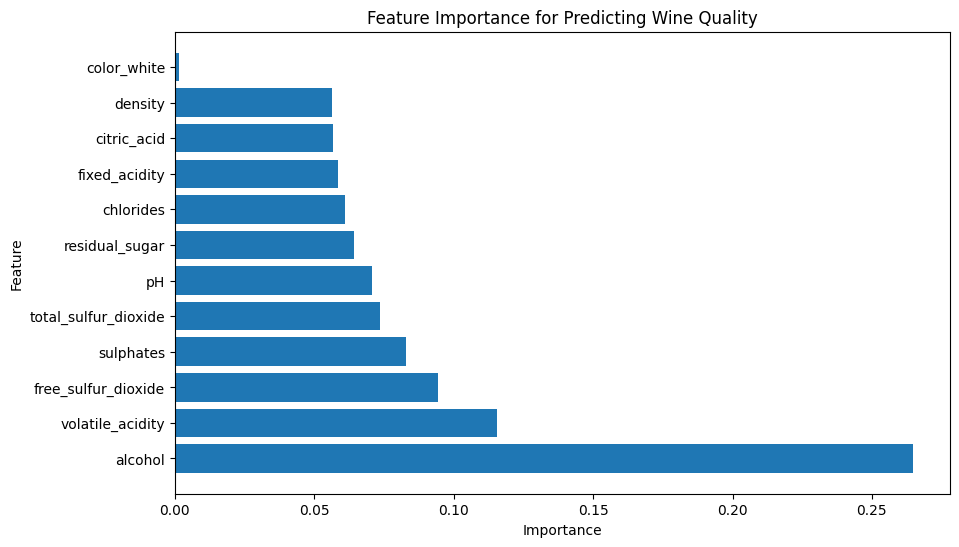

In [29]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Wine Quality')
plt.savefig('../Viz/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Save the model
joblib.dump(best_model, '../model/wine_quality_predictor.pkl')

# Load the model (later)
loaded_model = joblib.load('../model/wine_quality_predictor.pkl')

In [32]:
# Example input
new_data = pd.DataFrame({
    'fixed_acidity': [7.4],
    'volatile_acidity': [0.7],
    'citric_acid': [0.0],
    'residual_sugar': [1.9],
    'chlorides': [0.076],
    'free_sulfur_dioxide': [11.0],
    'total_sulfur_dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4],
    'color_white': [0]
})

# Make a prediction
prediction = loaded_model.predict(new_data)
print(f"Predicted Quality: {prediction[0]}")

Predicted Quality: 5.080801248548944
